# Приоритизация гипотез и анализ A/B-теста 

**Необходимо**:  
1) приоритизировать гипотезы  
2) запустить A/B-тест и проанализировать результаты.

**Описание данных**:  
  
*hypothesis*  
`Hypothesis` - гипотезы  
`Reach` - скольких пользователей затронет изменение  
`Impact`- насколько сильно изменение повлияет на пользователей  
`Confidence` - увереность что это изменение повлияет на пользователей  
`Efforts` - сколько стоит протестировать эту гипотезу  
  
*orders*  
`transactionId` - ID заказа  
`visitorId` - ID клиента  
`date` - дата заказа  
`revenue` - сумма заказа  
`group` - группа тестирования  
  
*visitors*  
`date` - дата сессии  
`group` - группа тестирования   
`visitors` - количество сессий  


## Шаг 1. Изучение данных

### Импорт библиотек и таблиц

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

### Анализ таблиц

In [2]:
def my_analysis(data):
    '''Функция для анализа датафрейма.'''

    # Общая информация.
    print('Общая информация \n')
    data.info()
    print(30 * '= ')

    # Вывод первых 5 строк датафрейма.
    print('Первые 5 строк датафрейма')
    display(data.head())
    print(30 * '= ')

    # Названия столбцов.
    print(f'Названия столбцов: {list(data.columns)}')
    print(30 * '= ')

    # Пропуски.
    print('Инофрмация о пропусках')
    display(data.isna().sum())
    print(30 * '= ')

    # Полные дубликаты.
    print(f'Полных дубликатов: {data.duplicated().sum()}')
    print(60*'=')
    #return


In [3]:
my_analysis(hypothesis)

Общая информация 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Первые 5 строк датафрейма


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Названия столбцов: ['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts']
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Инофрмация о пропусках


Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Полных дубликатов: 0


In [4]:
my_analysis(orders)

Общая информация 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Первые 5 строк датафрейма


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Названия столбцов: ['transactionId', 'visitorId', 'date', 'revenue', 'group']
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Инофрмация о пропусках


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Полных дубликатов: 0


In [5]:
my_analysis(visitors)

Общая информация 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Первые 5 строк датафрейма


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Названия столбцов: ['date', 'group', 'visitors']
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Инофрмация о пропусках


date        0
group       0
visitors    0
dtype: int64

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Полных дубликатов: 0


### Оптимизация данных

In [6]:
# перевел столбцы с датами в формат datetime64
orders['date'] = pd.to_datetime(orders['date']) 
visitors['date'] = pd.to_datetime(visitors['date'])

# перевод названия столбцов в нижний регистр
hypothesis.set_axis(
    ['hypothesis', 'reach', 'impact', 'confidence', 'efforts'],
    axis = 'columns',inplace = True)

### Вывод  
  
Импортировал библиотеки и таблицы.  
Проанализировад данные - аномалий и дубликатов нет.  
Конвертировал столбцы с датами из формата 'object' в формат 'datetime64'.  
Привел в нижний регистр названия столбцов таблицы 'hypothesis'

## Шаг 2. Приоритизация гипотез

In [7]:
# расчет ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»)
hypothesis['ICE'] = hypothesis.impact * hypothesis.confidence / hypothesis.efforts 

# расчет RICE (R от англ. reach, «охват»)
hypothesis['RICE'] = (hypothesis.reach * hypothesis.impact * hypothesis.confidence) / hypothesis.efforts

In [8]:
pd.options.display.max_colwidth = 210 # отобразить всю ячейку
hypothesis[['hypothesis', 'ICE', 'reach']].sort_values('ICE', ascending=False)

,hypothesis,ICE,reach
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,1
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,10
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,5
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,8
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3


In [9]:
hypothesis[['hypothesis', 'RICE', 'reach']].sort_values('RICE', ascending=False)

,hypothesis,RICE,reach
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,8
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,5
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,1
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,8
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,3
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,3


### Вывод  
  
Расчитал ICE и RICE.   
  
Наиболее перспективные гипотезы по **ICE**:  
  
* Запустить акцию, дающую скидку на товар в день рождения  
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  
* Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию  
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
  
Наиболее перспективные гипотезы по **RICE**:  
  
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек   заказа  
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  
* Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию  
* Запустить акцию, дающую скидку на товар в день рождения   
  
Рейтинг гипотез  ICE и RICE сильно отличаются. Происходит это из-за большой разницы в охвате.  
На первых двух местах по ICE гипотезы с охватом - 1 и 3 соответсвенно. по RICE - 10 и 8.  
  
Гипотезы фреймворка RICE, набравшие наибольшее количество баллов, являются наиболее приоритетными. Именно их рекомендуется использовать при проведении A/B-теста.

## Шаг 3 Анализ A/B-теста

#### Предварительные данные

In [10]:
# функция определения минимальной и максимальной дат
def dates(x):
    display(x.date.min())
    display(x.date.max())

In [11]:
# минимальная и максимальная дата
dates(visitors)

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [12]:
# минимальная и максимальная дата
dates(visitors)

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [13]:
# общее количество заказов в двух группах
orders.groupby('group').agg({'transactionId' : 'count'})

,transactionId
group,
A,557
B,640


In [14]:
# общее количество уникальных пользователей в двух группах
orders.groupby('group').agg({'visitorId' : 'nunique'})

,visitorId
group,
A,503
B,586


In [15]:
# количество уникальных пользователей, которые оказались одновременно в двух группах
unique_visitors = orders.loc[:, ['visitorId', 'group']].drop_duplicates().drop(columns=['group'])
unique_visitors.visitorId.duplicated().sum()

58

##### Вывод  
  
Тест начался 1 августа 2019 и закончился 31 августа 2019  
Общее количество заказов в группах не совпадает. В группе А зафиксировано 557 заказов, в группе В - 640. Сравнение уникальных пользователей также выявило различия. В группе В на 83 уникальных пользователя больше. Кроме того, в группе А и группе В оказалось 58 пользователей одновременно.

### Графики

#### График кумулятивной выручки по группам.

In [16]:
# DF с уникальными парами 'date' и'group'
datesGroups = orders[['date', 'group']].drop_duplicates() 

In [17]:
# агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    # строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group'] 
        )
    ].agg(
        {
            'date': 'max', # максимальная дата
            'group': 'max',
            'transactionId': 'nunique', # число уникальных ID заказов
            'visitorId': 'nunique', # число уникальных ID пользователей
            'revenue': 'sum', # сумма средних чеков
        }
    ),
    axis=1, # Применим методы к каждой строке DF
).sort_values(by=['date', 'group']) 


In [18]:
# агрегированные кумулятивные по дням данные о посетителях  
visitorsAggregated = datesGroups.apply(
    # строки таблицы visitors, дата которых меньше или равна дате элемента из datesGroups
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date' : 'max', # максимальная дата
            'group' : 'max', 
            'visitors' : 'sum' # число уникальных ID пользователей
        }
    ),
    axis=1 # Применим методы к каждой строке DF
).sort_values(by=['date','group'])

In [19]:
# объединяем кумулятивные данные в одной таблице 
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

# и присваиваем ее столбцам понятные названия
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


In [20]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

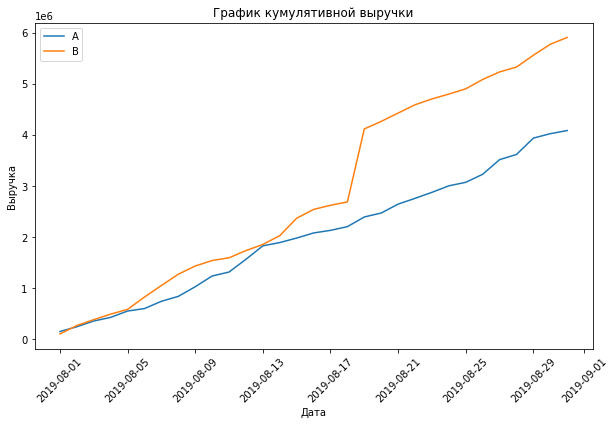

In [21]:
plt.figure(figsize=(10, 6)) # размер графика

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() # подпись графиков
plt.xticks(rotation=45) # поворот подписи оси Х
plt.xlabel('Дата')
plt.ylabel('Выручка') 
plt.title('График кумулятивной выручки')
plt.show()


##### Вывод  
  
Выручка росло в обеих группах.    
Группа 'B' вышла вперед 5-го августа и резко увеличила разрыв с 8 августа.  
Резкие скачки могут сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

#### График кумулятивного среднего чека по группам

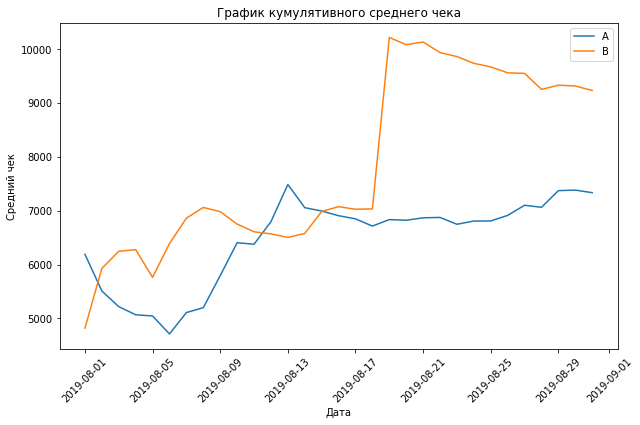

In [22]:
plt.figure(figsize=(10, 6)) # размер графика

# график среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# график среднего чека группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() # подпись графиков
plt.xticks(rotation=45) # поворот подписи оси Х
plt.xlabel('Дата')
plt.ylabel('Средний чек') 
plt.title('График кумулятивного среднего чека')
plt.show()

##### Вывод  
  
Очень сильные колебания среднего чека в обеих группах.  
Самый сильный скачек у группы 'B' 17 августа, после которого плавное снижение.  
Возможно, в группу B попали крупные заказы.

#### График относительного изменения кумулятивного среднего чека группы B к группе A.

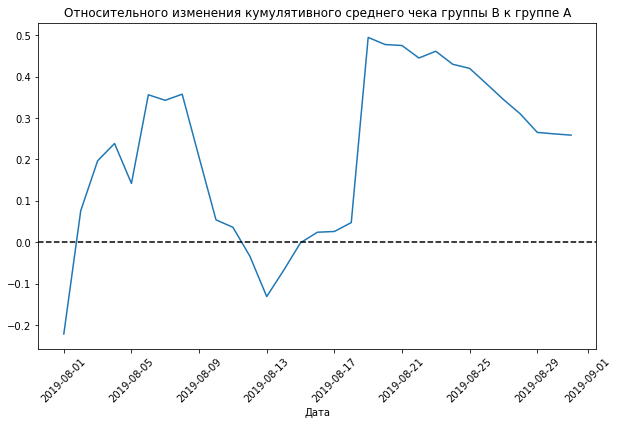

In [23]:
plt.figure(figsize=(10, 6)) # размер графика

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(
    mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
    /
    (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.xticks(rotation=45) # поворот подписи оси Х  
plt.xlabel('Дата')
plt.title('Относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show()

##### Вывод  
  
В нескольких точках график различия между группами резко «скачет». Видимо тогда были совершены крупные заказы.

#### График кумулятивной конверсии по группам

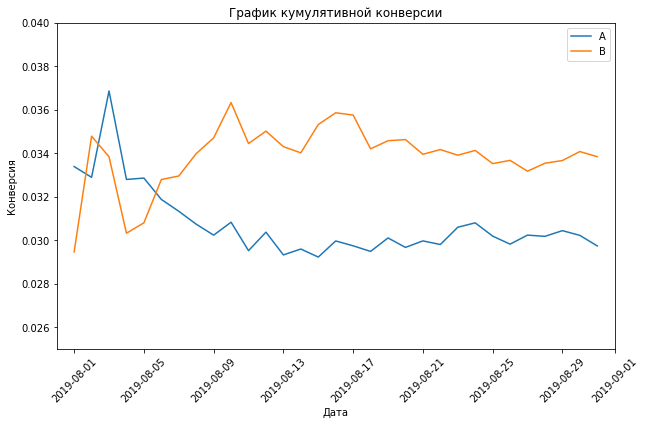

In [24]:
plt.figure(figsize=(10, 6)) # размер графика

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), 0.025, 0.04])
plt.xticks(rotation=45) # поворот подписи оси Х  
plt.xlabel('Дата')
plt.ylabel('Конверсия') 
plt.title('График кумулятивной конверсии')
plt.show()

##### Вывод  
  
В начале теста конварсия группы 'B' была ниже. Но уже на 6-й день стала выше конверсии группы 'A' и зафиксировалась примерно на одном уровне с 17 августа.  
КОнверсия группы 'A' начал проседать с начала эксперемента, изафиксировалась примерно 10 августа.

#### График относительного изменения кумулятивной конверсии группы B к группе A

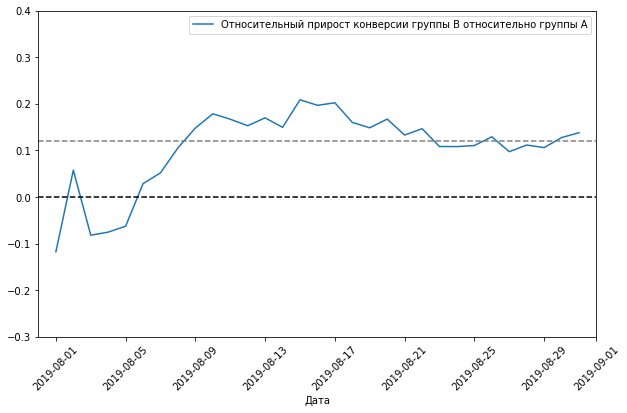

In [25]:
plt.figure(figsize=(10, 6)) # размер графика

# объединение кумулятивных таблиц с конверсией
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# строим график
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

# задаем параметры осей
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.12, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), -0.3, 0.4])
plt.xticks(rotation=45) # поворот подписи оси Х  
plt.xlabel('Дата')
plt.show()

##### Вывод  
  
В начале теста, конверсия группы 'B' проигрывала относительно грыппы 'А'. Но начиная с 5 августа резко вышла в перед, дойдя до 20%, и в третьей декаде августа установилась на уровне 12%   

#### Гистограмма и точечный график количества заказов по пользователям

In [26]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False) # сгруппируем заказы по пользователям
    .agg({'transactionId': 'nunique'}) # подсчитает число уникальных заказов
)
ordersByUsers.columns = ['userId', 'orders'] # переименование столбцов


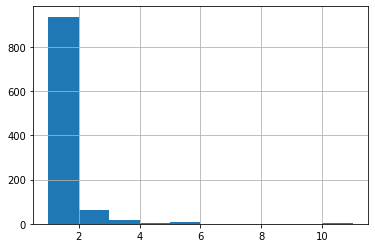

In [27]:
ordersByUsers.orders.hist() # гистограмма
plt.show()

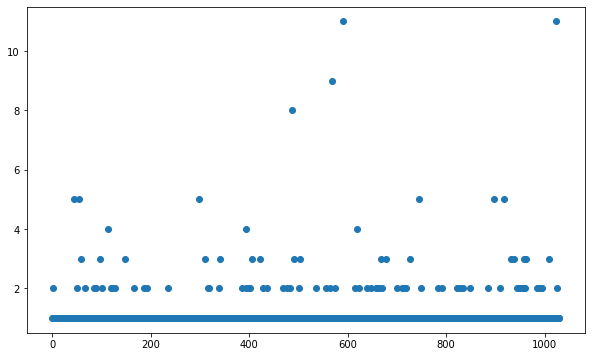

In [28]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

# строим точечный график
plt.figure(figsize=(10, 6)) # размер графика
plt.scatter(x_values, ordersByUsers.orders)

plt.show()

##### Вывод  
Построил гистограмму и точечный график.  
Видно что в основном пользователи ограничиваются 1-2 покупками. Но есть аномальные значения от 3-10 покупок.

#### Перцентили количества заказов на пользователя

In [29]:
np.percentile(ordersByUsers['orders'], [90, 95, 99]) # количество заказов по перцентилям

array([1., 2., 4.])

##### Вывод  
  
95 процентов пользователей сделали менее двух покупок

#### Гистограмма и точечный график стоимостей заказов

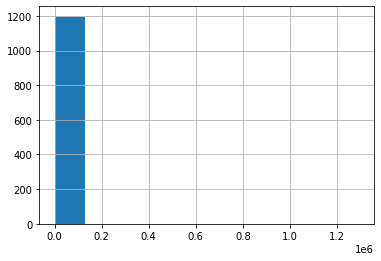

In [30]:
orders.revenue.hist() # гистограмма
plt.show()

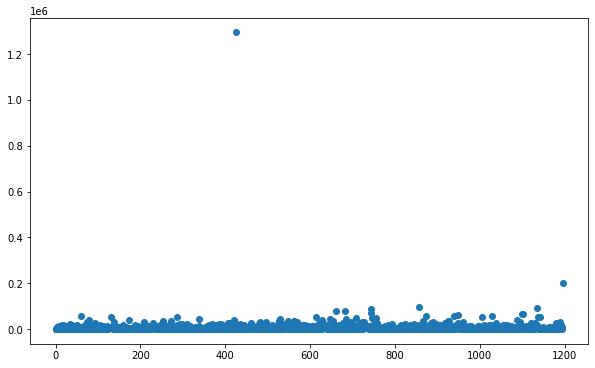

In [31]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(orders['revenue'])))

# строим точечный график
plt.figure(figsize=(10, 6)) # размер графика
plt.scatter(x_values, orders.revenue)
plt.show()

##### Вывод  
  
Построил гистограмму и точечный график.  
Видно что стоимость покупки не привышает 20 000. Но есть аномальные значения в плоть до 1 млн за покупку.

#### Перцентили стоимости заказов.

In [32]:
np.percentile(orders.revenue, [90,95,99]) # стоимость заказов по перцентилям

array([18168. , 28000. , 58233.2])

##### Вывод  
  
Стоимость 95% покупок не превышает 28 000

### Статистика

#### Статистическая значимость различий в конверсии между группами по «сырым» данным

Сформулируем **гипотезы**.  
* Нулевая: различий в конверсии между группами нет.  
* Альтернативная: различия в конверсии между группами есть.

In [33]:
# таьлица посетителей группа 'A'
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA'] # название столбцов

# агрегированные кумулятивные по дням данные о количестве посетителей группа 'A'
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 
         'visitorsPerDateA': 'sum'} # количество посетителей
    ),
    axis=1, # Применим методы к каждой строке DF
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA'] # название столбцов

# таьлица посетителей группа 'B'
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB'] # название столбцов

# агрегированные кумулятивные по дням данные о количестве посетителей группа 'В'
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1, # Применим методы к каждой строке DF
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB'] # название столбцов

In [34]:
# таблица с заказами группа "А"
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False) # группировка по дате и сброс индекса
    .agg({'transactionId': pd.Series.nunique, # уникальное id заказа
          'revenue': 'sum'}) # сумма выручки
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA'] # название столбцов

# агрегированные кумулятивные по дням данные о заказах посетителей группа 'А'
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 
         'ordersPerDateA': 'sum', # количество заказов
         'revenuePerDateA': 'sum'} # выручка
    ),
    axis=1, # Применим методы к каждой строке DF
).sort_values(by=['date']) # сортировка по дате

ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
] # название столбцов

# таблица с заказами группа "В"
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False) # группировка по дате и сброс индекса
    .agg({'transactionId': pd.Series.nunique, # уникальное id заказа
          'revenue': 'sum'}) # сумма выручки
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB'] # название столбцов

# агрегированные кумулятивные по дням данные о заказах посетителей группа 'В'
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 
         'ordersPerDateB': 'sum', # количество заказов
         'revenuePerDateB': 'sum'} # выручка
    ),
    axis=1, # Применим методы к каждой строке DF
).sort_values(by=['date']) # сортировка по дате

ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]  # название столбцов


In [35]:
# Объединение таблиц
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


In [36]:
# Таблица с количеством заказов по юзерам. группа "А"
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders'] # название столбцов

# Таблица с количеством заказов по юзерам. группа "B"
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] # название столбцов

In [37]:
# получаем Series объект, где на каждого пользователя проставлено число заказов 
# (если пользователь не покупал, то стоит 0)

# группа "А"
sampleA = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
               name='orders')],
    axis=0)

# группа "В"
sampleB = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
               name='orders')],
    axis=0)

In [38]:
p_value = float("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])) # тест Манна-Уитни

print('\n', p_value)
if p_value < 0.05:
    print('\n Отвергаем нулевую теорию, в средней конверсии между группами есть статистически значимые различия')
else:
    print('\n Не получилось отвергнуть нулевую гипотезу')


 0.01679

 Отвергаем нулевую теорию, в средней конверсии между группами есть статистически значимые различия


In [39]:
print('\nОтносительный прирост средней конверсии B к А:')
print("{0:.5f}".format(sampleB.mean() / sampleA.mean() - 1))


Относительный прирост средней конверсии B к А:
0.13808


##### Вывод  
  
Сформулировал Гипотезу. Провел тест.  
  
В среднем количестве заказов между группами есть статистически значимые различия. Нулевую гипотезу отвергаем.  
Относительный прирост среднего группы B к конверсии группы А: ~14%

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем **гипотезы**.  
* Нулевая: различий в среднем чеке между группами нет.  
* Альтернативная: различия в среднем чеке между группами есть.

In [40]:
# p-value тест Манна-Уитни
p_value = float('{0:.3f}'.format(
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('\n', p_value)
if p_value < 0.05:
    print('\n Отвергаем нулевую теорию, в среднем чеке между группами есть статистически значимые различия')
else:
    print('\n Не получилось отвергнуть нулевую гипотезу')


 0.729

 Не получилось отвергнуть нулевую гипотезу


In [41]:
print('\nОтносительный прирост среднего чека между сегментами:')
print('{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


Относительный прирост среднего чека между сегментами:
0.259


##### Вывод  
  
Сформулировал Гипотезу. Провел тест.  
  
В среднем чеке между группами нет статистически значимых различий.  
Относительное различие среднего чека между сегментами 25.9%

#### Статистическая значимость различий в конверсии между группами по «очищенным» данным

In [42]:
orders95 = np.percentile(ordersByUsers['orders'], 95)
orders95

2.0

In [43]:
revenue95 = np.percentile(orders.revenue, 95) # выручка до 95 перцентиля
orders95 = np.percentile(ordersByUsers['orders'], 95) # количество заказов до 95 перцентиля

# таблица с заказами больше 95 перцентиля
usersWithManyOrders = pd.concat( 
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders95]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders95]['userId'],
    ],
    axis=0,
)

# таблица с чеками больше 95 перцентиля
usersWithExpensiveOrders = orders[orders['revenue'] > revenue95]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)


In [44]:
# из заказов группы "А" уберем аномальных юзеров
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# из заказов группы "В" уберем аномальных юзеров
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [45]:
p_value = float('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])) # тест Манна-Уитни

print('\n', p_value)
if p_value < 0.05:
    print('\n Отвергаем нулевую теорию, в средней конверсии между группами есть статистически значимые различия')
else:
    print('\n Не получилось отвергнуть нулевую гипотезу')


 0.01304

 Отвергаем нулевую теорию, в средней конверсии между группами есть статистически значимые различия


In [46]:
print('\nОтносительный прирост средней конверсии B к А:')
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


Относительный прирост средней конверсии B к А:
0.173


##### Вывод  
  
Как и в случае с сырыми данными, p-value не превысил 0,05, а значит, нулевую гипотезу отвергаем. Сегмент В оказался лучше по конверсии на 17,3%, еще лучше, чем до "очистки" данных

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [47]:
# p-value тест Манна-Уитни
p_value = float('{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    ))
print('\n', p_value)
if p_value < 0.05:
    print('\n Отвергаем нулевую теорию, в среднем чеке между группами есть статистически значимые различия')
else:
    print('\n Не получилось отвергнуть нулевую гипотезу')


 0.738

 Не получилось отвергнуть нулевую гипотезу


In [48]:
print('\nОтносительный прирост среднего чека между сегментами:')
print("{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    ))


Относительный прирост среднего чека между сегментами:
-0.020


##### Вывод  
  
P-value оказался примерно на том же уровне - 0,738, как и с сырыми данными, т.е. нулевую гипотезу мы не можем отвергнуть. А вот средний чек у сегмента В снизился настолько, что сегмент А стал превосходить В, но всего лишь на 2%. После "очистки" данных, удаления выбросов разница в среднем чеке между двумя группами сократилась до минимума.

### Вывод.  
  
Графики кумулятивной выручки, среднего чека и конверсии фиксируют превосходство группы В.  

График различия конверсии между группами сообщает, что результаты группы B лучше группы A: зафиксировались около среднего значения.

График различия среднего чека сильно колеблется, что свидетельствует о наличии аномалиий.

По итогам теста выявлено статистически значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий, а вот статистически значимых различий по среднему чеку не были зафиксированы в обоих случаях.

Исходя из обнаруженных фактов, тест следует остановить и зафиксировать победу группы В, результаты по конверсии которой оказались лучше группы А на 13,8% и 17,3% до и после "очистки" данных соответственно.